Grab needed packages

In [1025]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import warnings
def ignore_warn(*args, **kwagrs):
    pass
warnings.warn = ignore_warn

First, import data and perform some basic checking.

In [1026]:
data = pd.read_csv('../data/trainingset.txt')

Let's get some info on the shape of the data, the columns, and the first few rows.

In [1027]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
1,47,JobCat3,married,unknown,no,1506,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
2,31,unknown,single,unknown,no,1,no,no,unknown,5,may,0,1,-1,0,unknown,TypeA
3,26,JobCat6,single,tertiary,no,447,yes,yes,unknown,5,may,0,1,-1,0,unknown,TypeA
4,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA


In [1028]:
data.shape

(27272, 17)

In [1029]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,27272.000000,27272.000000,27272.000000,27272.0,27272.000000,27272.000000,27272.000000
mean,39.880463,1361.079459,15.769287,0.0,2.739623,40.074105,0.578872
std,11.426248,3015.207142,8.300983,0.0,3.011097,100.200984,1.942882
min,16.000000,-6847.000000,1.000000,0.0,1.000000,-1.000000,0.000000
25%,31.000000,73.000000,8.000000,0.0,1.000000,-1.000000,0.000000
50%,37.000000,447.000000,16.000000,0.0,2.000000,-1.000000,0.000000
75%,48.000000,1423.000000,21.000000,0.0,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,0.0,63.000000,871.000000,58.000000


In [1030]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27272 entries, 0 to 27271
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27272 non-null  int64 
 1   job        27272 non-null  object
 2   marital    27272 non-null  object
 3   education  27272 non-null  object
 4   default    27272 non-null  object
 5   balance    27272 non-null  int64 
 6   housing    27272 non-null  object
 7   loan       27272 non-null  object
 8   contact    27272 non-null  object
 9   day        27272 non-null  int64 
 10  month      27272 non-null  object
 11  duration   27272 non-null  int64 
 12  campaign   27272 non-null  int64 
 13  pdays      27272 non-null  int64 
 14  previous   27272 non-null  int64 
 15  poutcome   27272 non-null  object
 16  y          27272 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.5+ MB


In [1031]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Let'c check some of the value distributions.

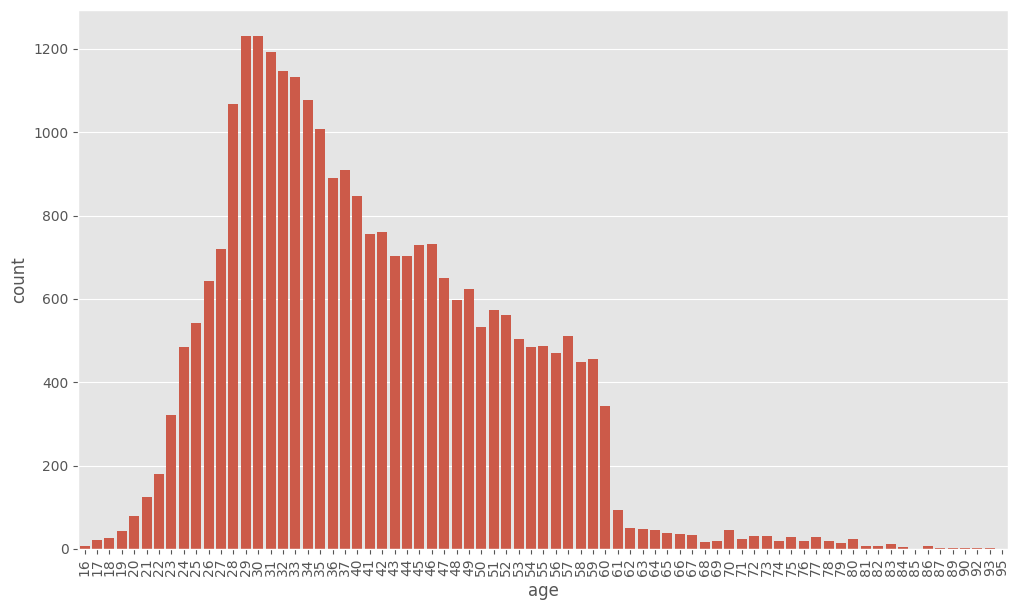

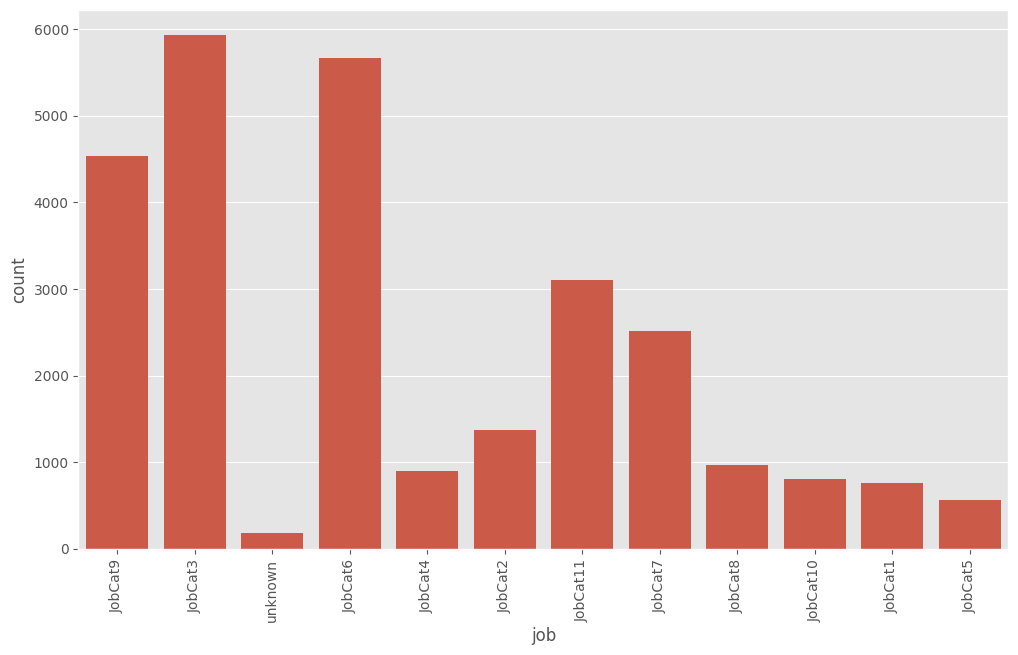

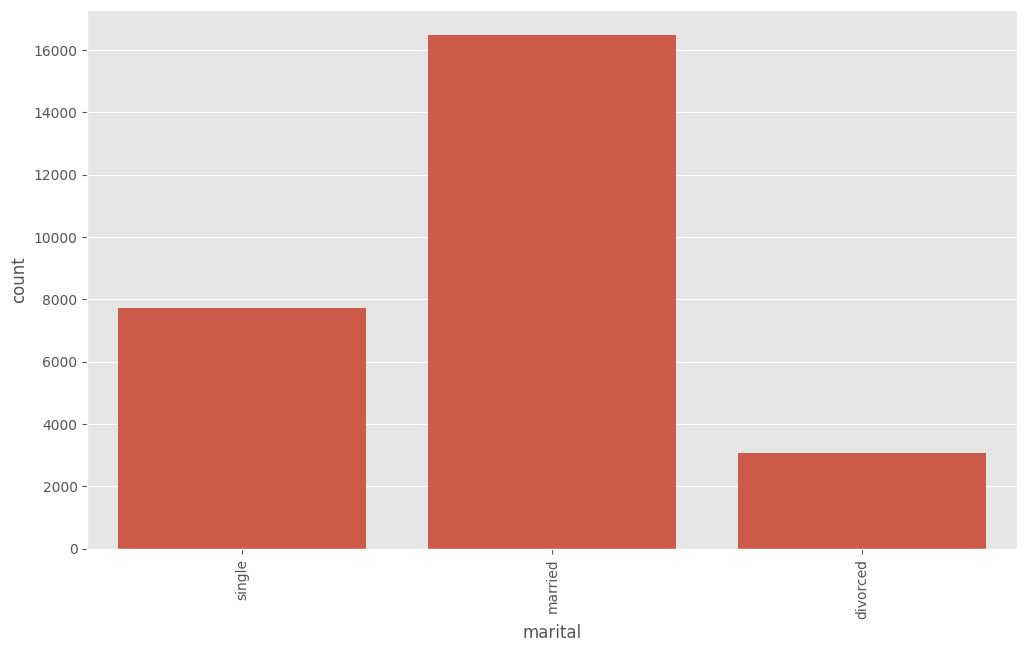

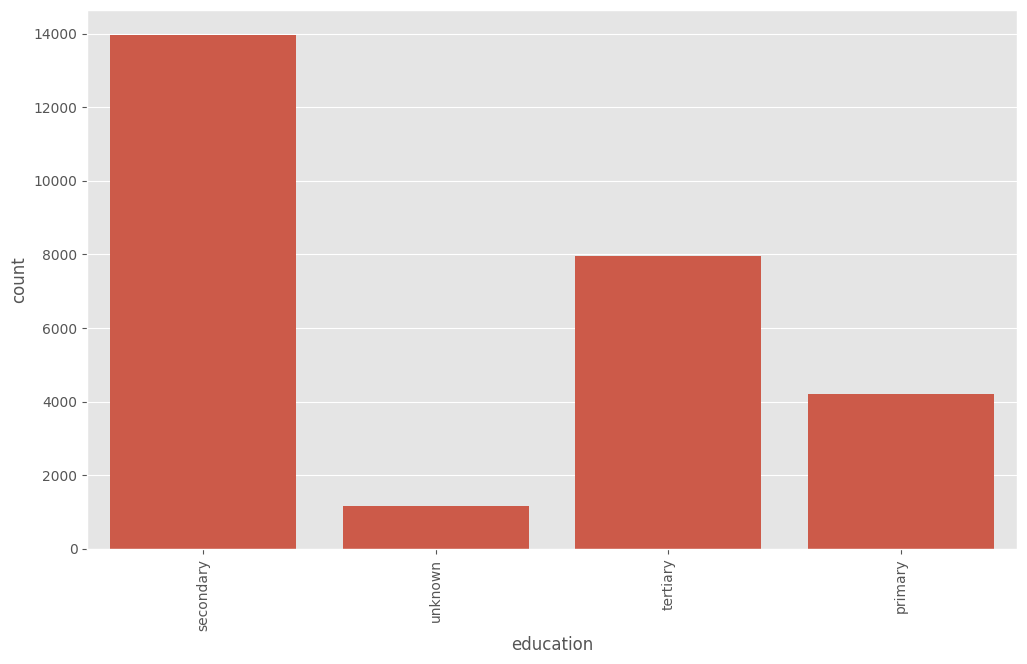

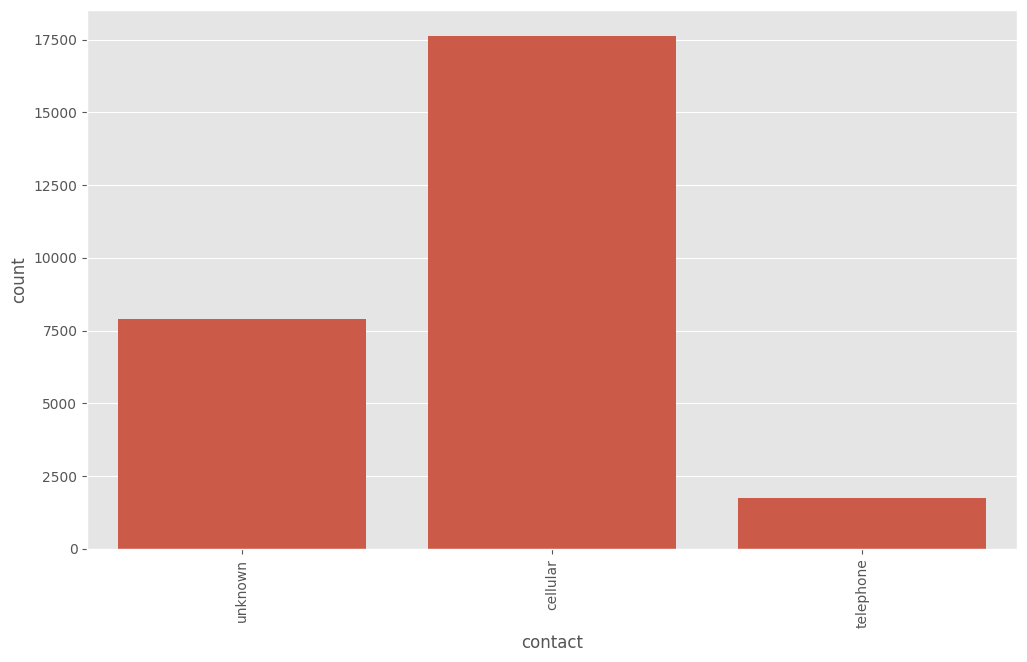

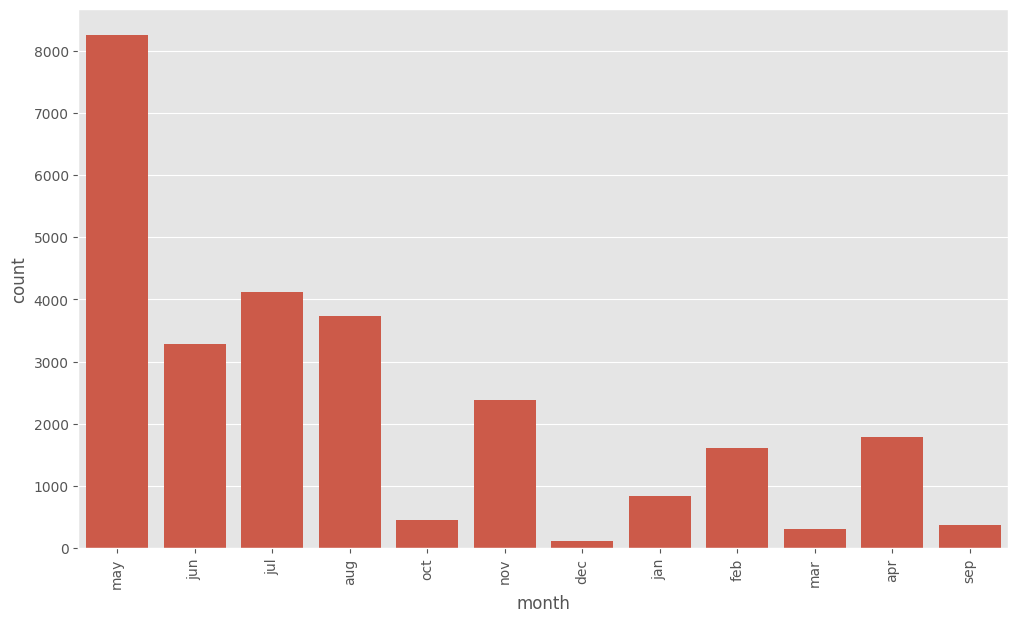

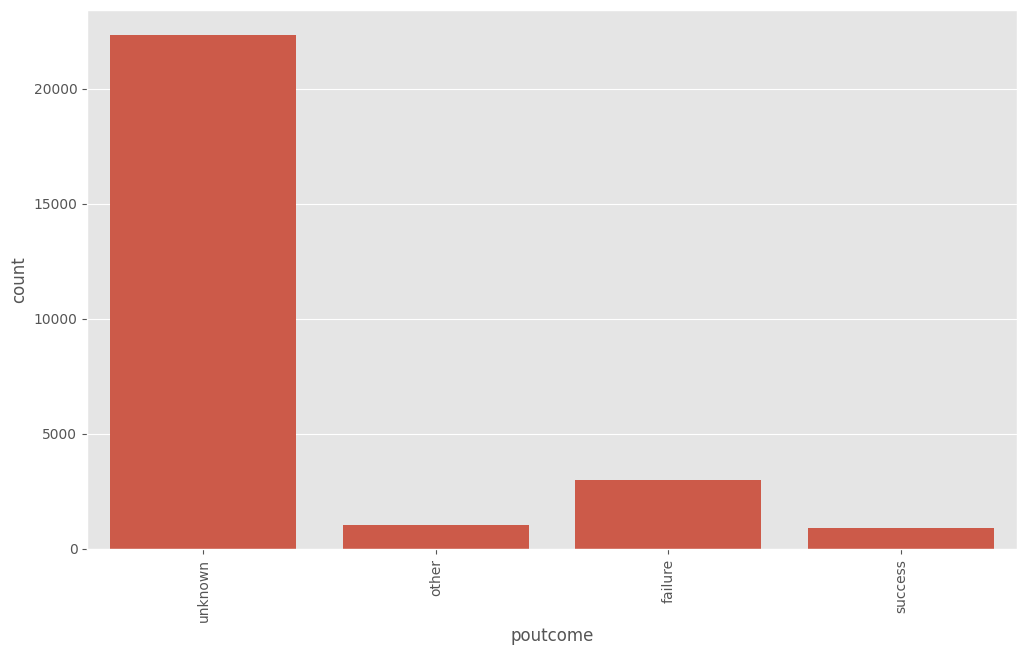

In [1032]:
count_list = ['age', 'job', 'marital', 'education', 'contact', 'month', 'poutcome']

for feature in count_list:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=feature, data=data)
    plt.xticks(rotation=90)
    plt.show()

Based on the above information, let's beging with some pre-processing. To start, rename the target column to be more readable. "Y" is a bit vague.

In [1033]:
data.rename(columns={'y': 'is_client'}, inplace=True)
data['is_client'] = data['is_client'].map({'TypeA': 0, 'TypeB': 1})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_client
0,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,0,1,-1,0,unknown,0
1,47,JobCat3,married,unknown,no,1506,yes,no,unknown,5,may,0,1,-1,0,unknown,0
2,31,unknown,single,unknown,no,1,no,no,unknown,5,may,0,1,-1,0,unknown,0
3,26,JobCat6,single,tertiary,no,447,yes,yes,unknown,5,may,0,1,-1,0,unknown,0
4,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,0,1,-1,0,unknown,0


Let's see how many clients we have in this dataset, versus not.

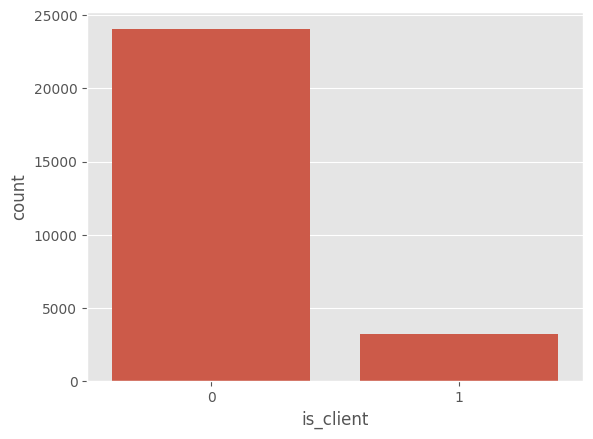

In [1034]:
sns.countplot(x='is_client', data=data)
plt.show()

Intresting, the vast majority of the dataset are not clients

If I were determining this, the first thing I'd check is age. Let's see how age is distributed in this dataset.

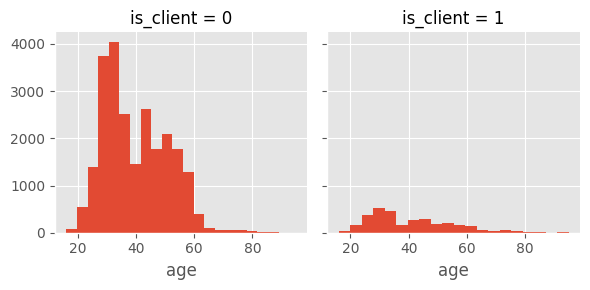

In [1035]:
age = sns.FacetGrid(data, col='is_client')
age.map(plt.hist, 'age', bins=20)
plt.show()

Intresting, the distribution is broadly the same. Even if the amount is different. 

Let's check job status...

In [1036]:
job = data[['job', 'is_client']].groupby(['job'], as_index=False).mean().sort_values(ascending=False, by='is_client')
job

,job,is_client
6,JobCat5,0.287744
3,JobCat2,0.239416
1,JobCat10,0.156250
7,JobCat6,0.141419
11,unknown,0.134831
2,JobCat11,0.120890
9,JobCat8,0.111917
10,JobCat9,0.110156
5,JobCat4,0.096667
8,JobCat7,0.090040


Well. That's not particularly useful. 

Next, let's look through the education column.

In [1037]:
data[['education', 'is_client']].groupby(['education'], as_index=False).mean().sort_values(by='is_client', ascending=False)

,education,is_client
2,tertiary,0.153014
3,unknown,0.144198
1,secondary,0.107104
0,primary,0.086346


Let's plot that on a graph. I want to try and judge the jobs. 

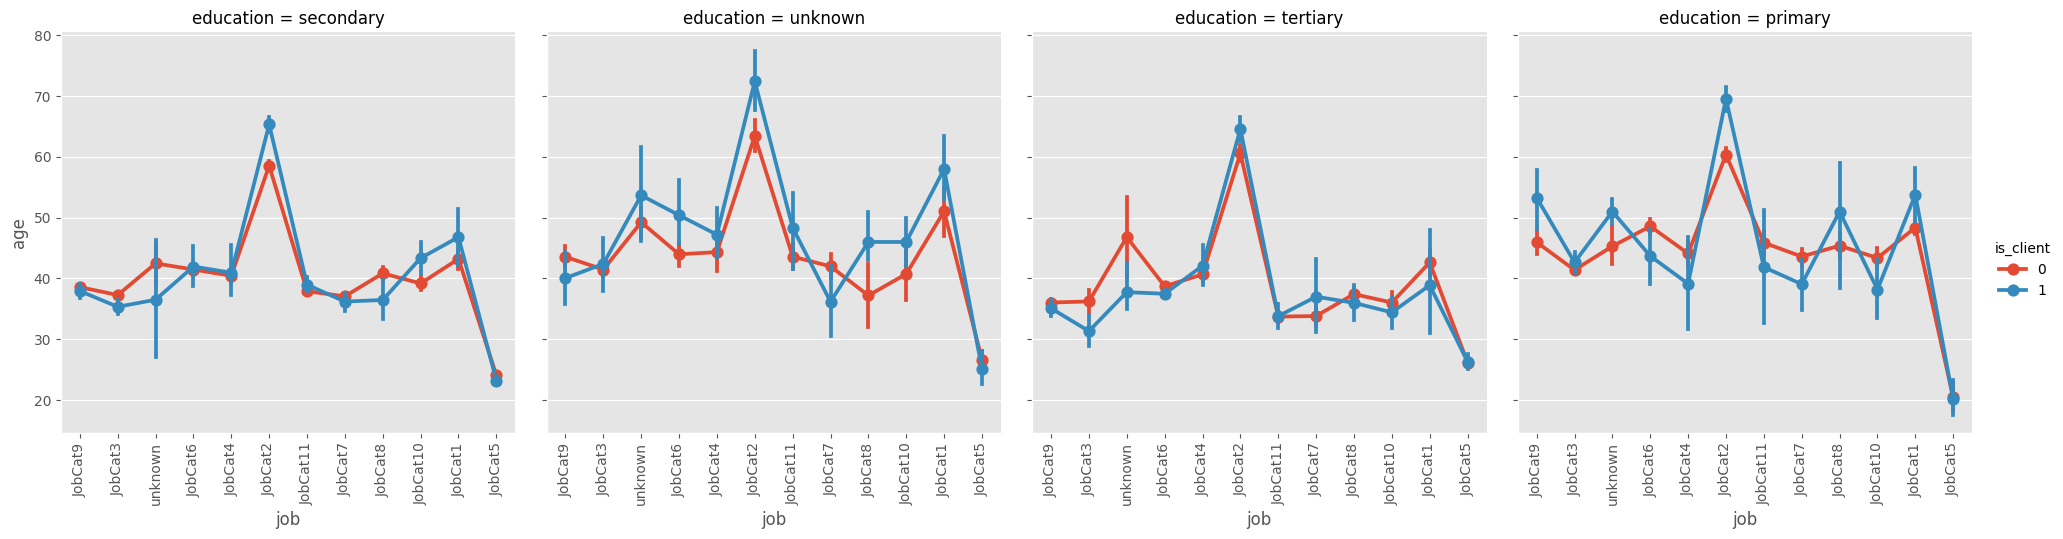

In [1038]:
g = sns.catplot(x='job', y='age', col='education', hue='is_client', kind='point', data=data)
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=90)
plt.show()

Okay, that's a bit more useful. We can make educated guesses about the jobs now, using the level of education- and life stage- as a guide. I'll use this later. Some specifc observations:

> * The Unknown catagory has a large peak, which suggests a job category with a higher average age for both the clients and non-clients.
> * Tertiary has a significant peak for a single job category. This could be a job that requires a degree, or a job that is more common in a certain age group. I suspect the latter. 
> * Primary education trends similarly to Secondary

Let's check the bank balance of the clients and non clients.

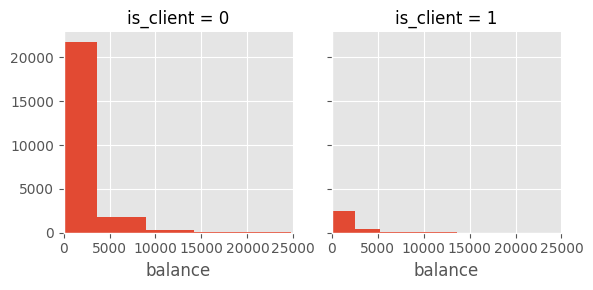

In [1039]:
g = sns.FacetGrid(col='is_client', data=data)
g.map(plt.hist, 'balance', bins=20)
g.set(xlim=(0, 25000))

Intresting, clients and non clients have similar distributions of bank balance.

Let's take a look at the contact column.

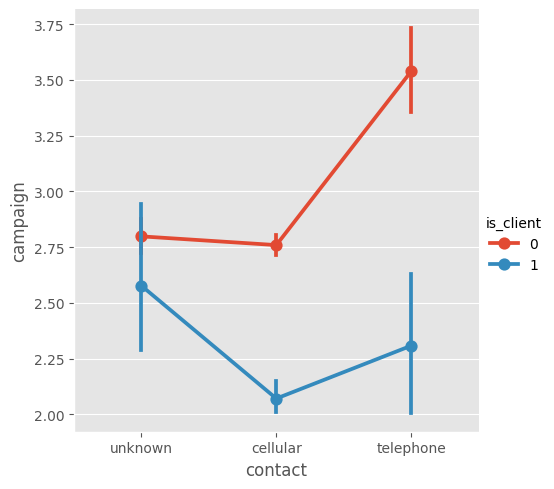

In [1040]:
sns.catplot(x='contact', y='campaign', hue='is_client', kind='point', data=data)

So, some key points:
> * Celluar contacts have fewer average contacts, with a lower variablity in the number of contacts among clients and non-clients.
> * Telephone contacts have a significant bias toward non-clients, there's also a huge variability, intresting. 

Alright, now for pdays. 

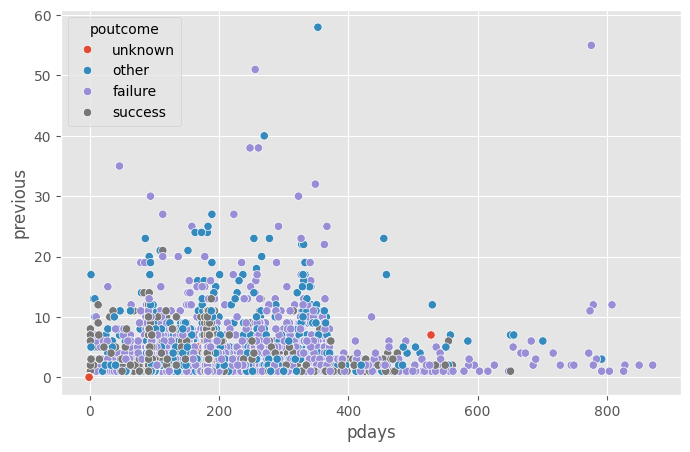

In [1041]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='pdays', y='previous', hue='poutcome', data=data)
plt.show()

Without knowing what the values mean, it's hard to say. However given the next few columns, I suspect this is to do with the number of days since the last contact (assuming previous is the abs amount). Making that assumption, we can say:
> * Sucess (I assume other is that) outcomes are generally associated with lower amounts of contacts
> * Failures has a healthy distribution, implying that the time since last contact is not a big factor in sucessess.

Let's see the distribution of previous...

<Axes: xlabel='previous', ylabel='count'>

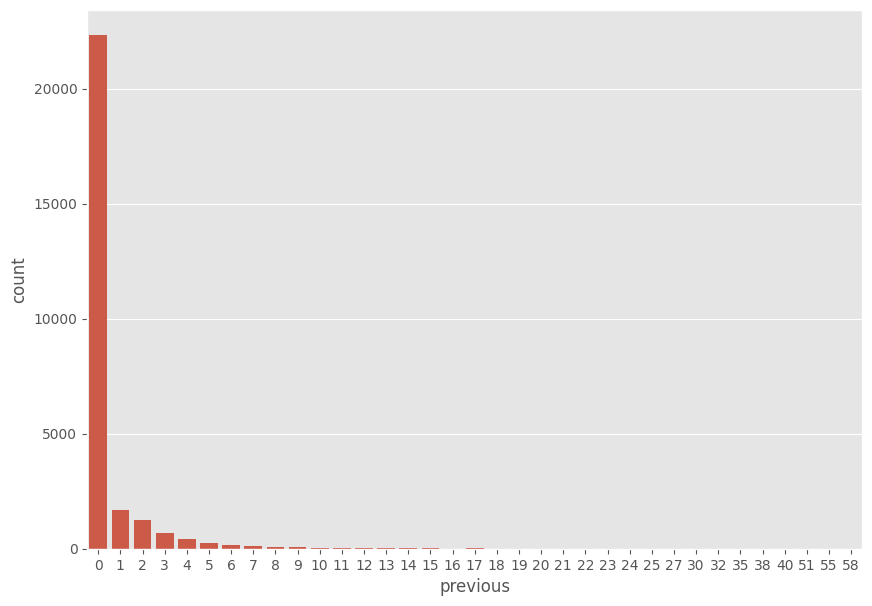

In [1042]:
plt.figure(figsize=(10, 7))
sns.countplot(x='previous', data=data)

Some key points:
> * The vast majority of clients have not been contacted before.
> * There's a rapid decrease in frequency as the time between contact increases.
> * There are VERY FEW cases where the contact interval exceeds 10

Now that we've analysed the dataset. Let's start work on predicting the clients. I've decided to acomplish this with a decision tree. I chose a decision tree because:
> * The dataset contains a mixture of Catagorical and Numerical features
> * Decision trees handle missing values well
> * Decision trees are very interpretable, you can visually see how they are making decisions, unlike other algorithims

In [1043]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree

I'm going to impute some variables, so I'll make a copy, I'll also define the features

In [1044]:
df = data.copy()

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_features = data.select_dtypes(include='number').columns.tolist()

Remove the target column from the dataset

In [1045]:
X = df.drop('is_client', axis=1)
y = df['is_client']

Impute the missing values

In [1046]:
from sklearn.impute import SimpleImputer

# I'm going to use most_frequent strategy to fill missing values
imputer = SimpleImputer(strategy='most_frequent')

df[categorical_features] = imputer.fit_transform(data[categorical_features])
df[numerical_features] = imputer.fit_transform(data[numerical_features])


Some encoding...

In [1047]:
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_encoded = column_transformer.fit_transform(X)

Train/Test split

In [1048]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=22)

Let's train the classifier

In [1049]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Now, let's see how well the classifier performs

In [1050]:
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4824
           1       0.31      0.35      0.33       631

    accuracy                           0.83      5455
   macro avg       0.61      0.62      0.62      5455
weighted avg       0.84      0.83      0.84      5455

Accuracy: 0.8326306141154903


82.3% accuracy. Not bad. Not high-enough to repersent overfitting I hope.

Now, let's see what the decision tree looks like (Note: This takes a while, and isn't that useful, however you can uncomment it and run it if you like)

In [1051]:
# fig = plt.figure(figsize=(15,10))
# _ = tree.plot_tree(classifier, 
#                    filled=True)

Now, let's import queries, run it through the clasifier, and output it as a 'csv' in a .txt

In [1052]:
queries = pd.read_csv('../data/queries.txt')

# Rename the column like it is in training, and remove it
queries.rename(columns={'y': 'is_client'}, inplace=True)
queries.drop('is_client', axis=1, inplace=True)

# Encode the values
queries_encoded = pd.get_dummies(queries)

# Run the classifier
y_pred = classifier.predict(queries_encoded)

# Print the results
results = queries.copy()
results['y'] = y_pred
results.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,JobCat6,married,tertiary,no,2143,yes,no,unknown,5,may,0,1,-1,0,unknown,0
1,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,0,1,-1,0,unknown,0
2,33,JobCat6,married,tertiary,no,231,yes,no,unknown,5,may,0,1,-1,0,unknown,0
3,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,0,1,-1,0,unknown,0
4,27,JobCat11,single,secondary,no,390,yes,no,unknown,5,may,0,1,-1,0,unknown,0


Does the queries table follow the same distribution as above?

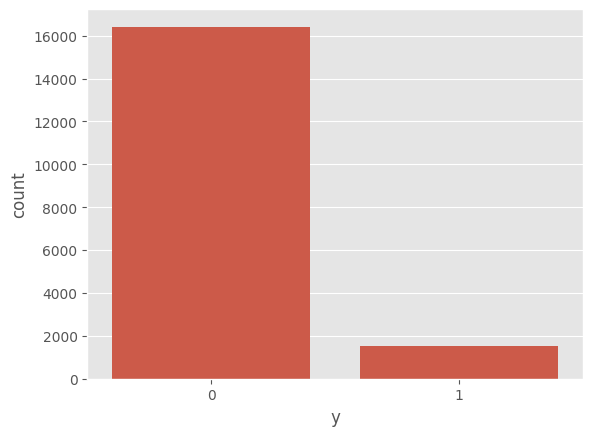

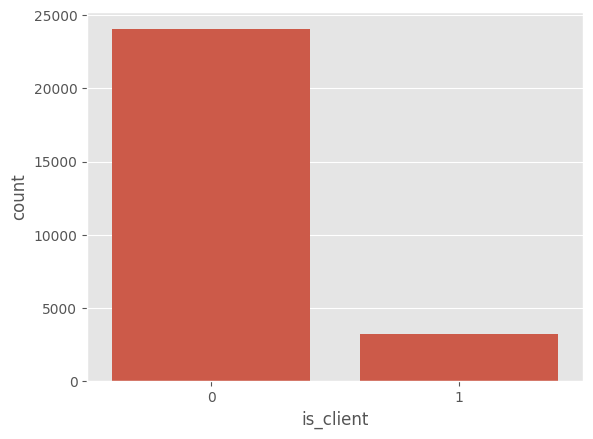

In [1053]:
sns.countplot(x='y', data=results)
plt.show()

sns.countplot(x='is_client', data=data)
plt.show()

Nice! Now let's print it out to a .txt as the assignment requires

In [1054]:
# Create a DataFrame from 'y' series
output = results[['y']]

# Reorder the csv so it starts from 1
output.index = np.arange(1, len(output) + 1)

# Change the names back to the original ones
output['y'] = output['y'].map({0: 'TypeA', 1: 'TypeB'})

# # Output the csv-as-txt
output.to_csv('../out/C19349793.txt', index=True, header=False)